#PCA for Compression

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


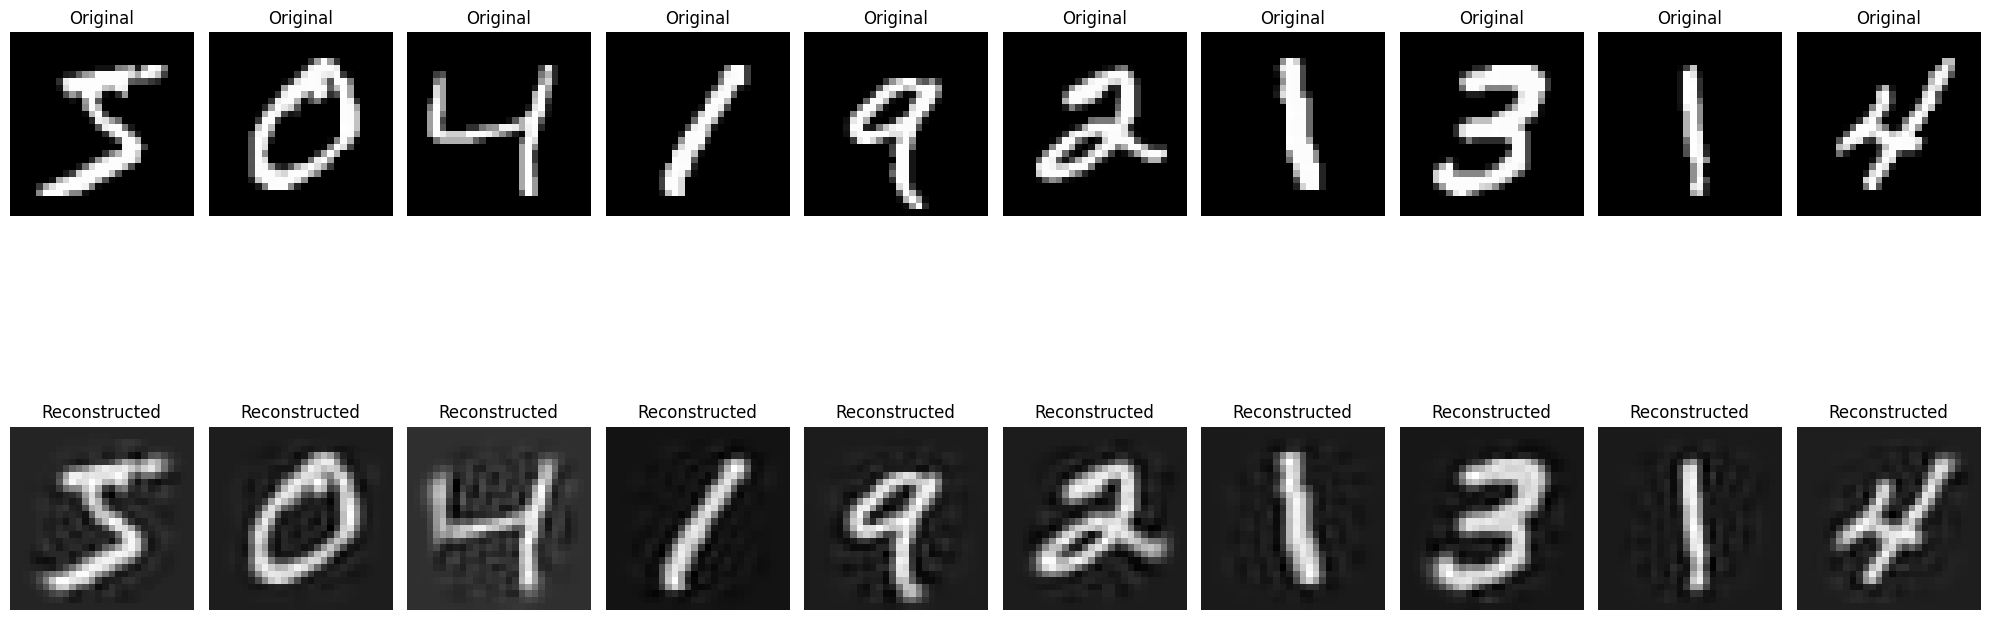

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy()  # Convert DataFrame to numpy array
y = mnist.target.astype(int)

# Perform PCA with 154 components
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

# Display the original and reconstructed images
plt.figure(figsize=(20, 10))
num_images = 10  # Number of images to display

for i in range(num_images):
    # Original Image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(X_recovered[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()


#Randomized PCA

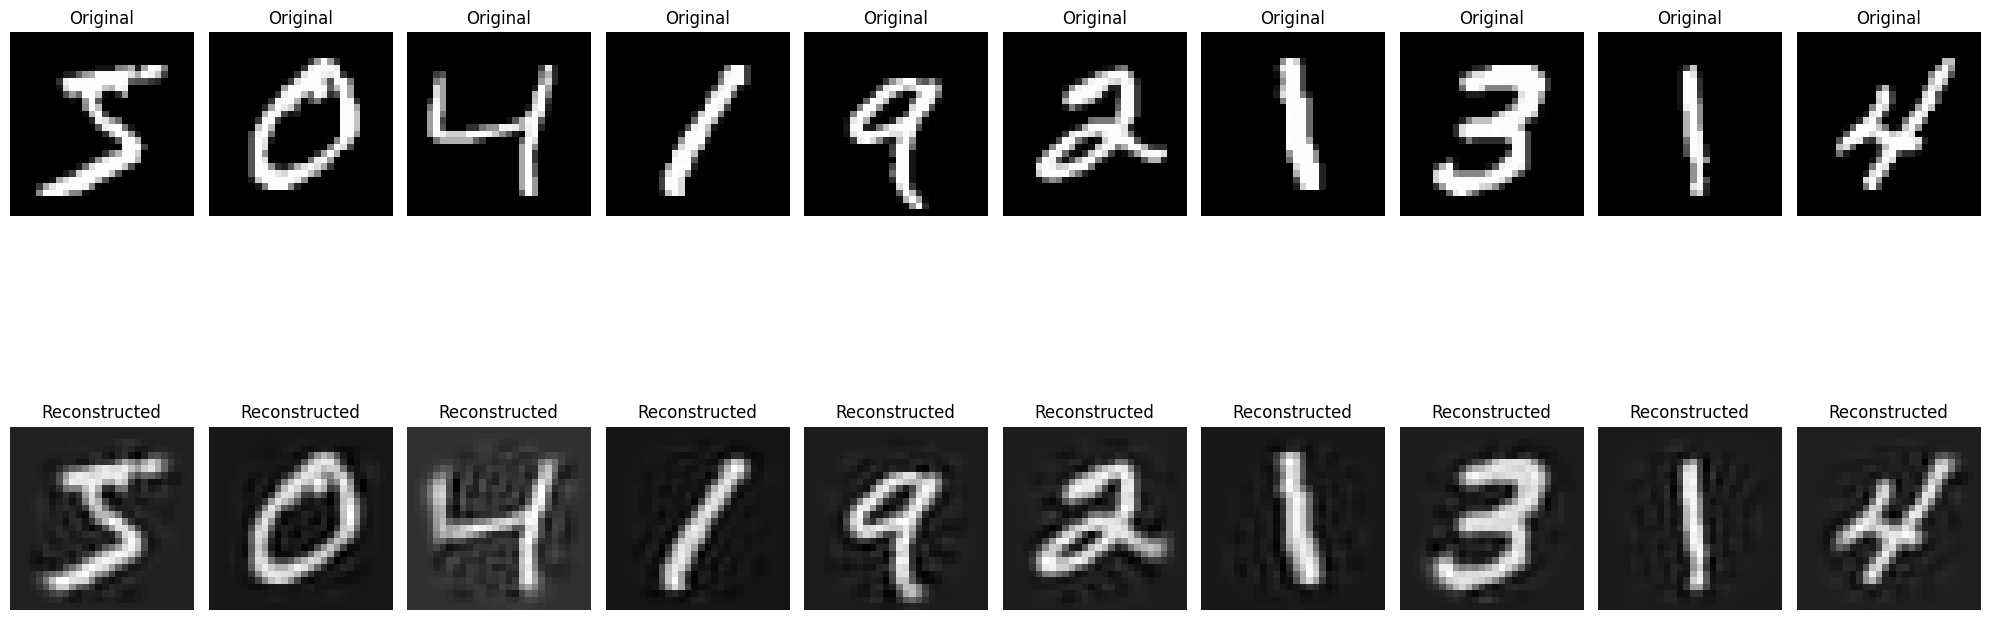

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA with 154 components
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)
X_recovered = rnd_pca.inverse_transform(X_reduced)

# Display the original and reconstructed images
plt.figure(figsize=(20, 10))
num_images = 10  # Number of images to display

for i in range(num_images):
    # Original Image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(X_recovered[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()


#PCA with Full SVD approach

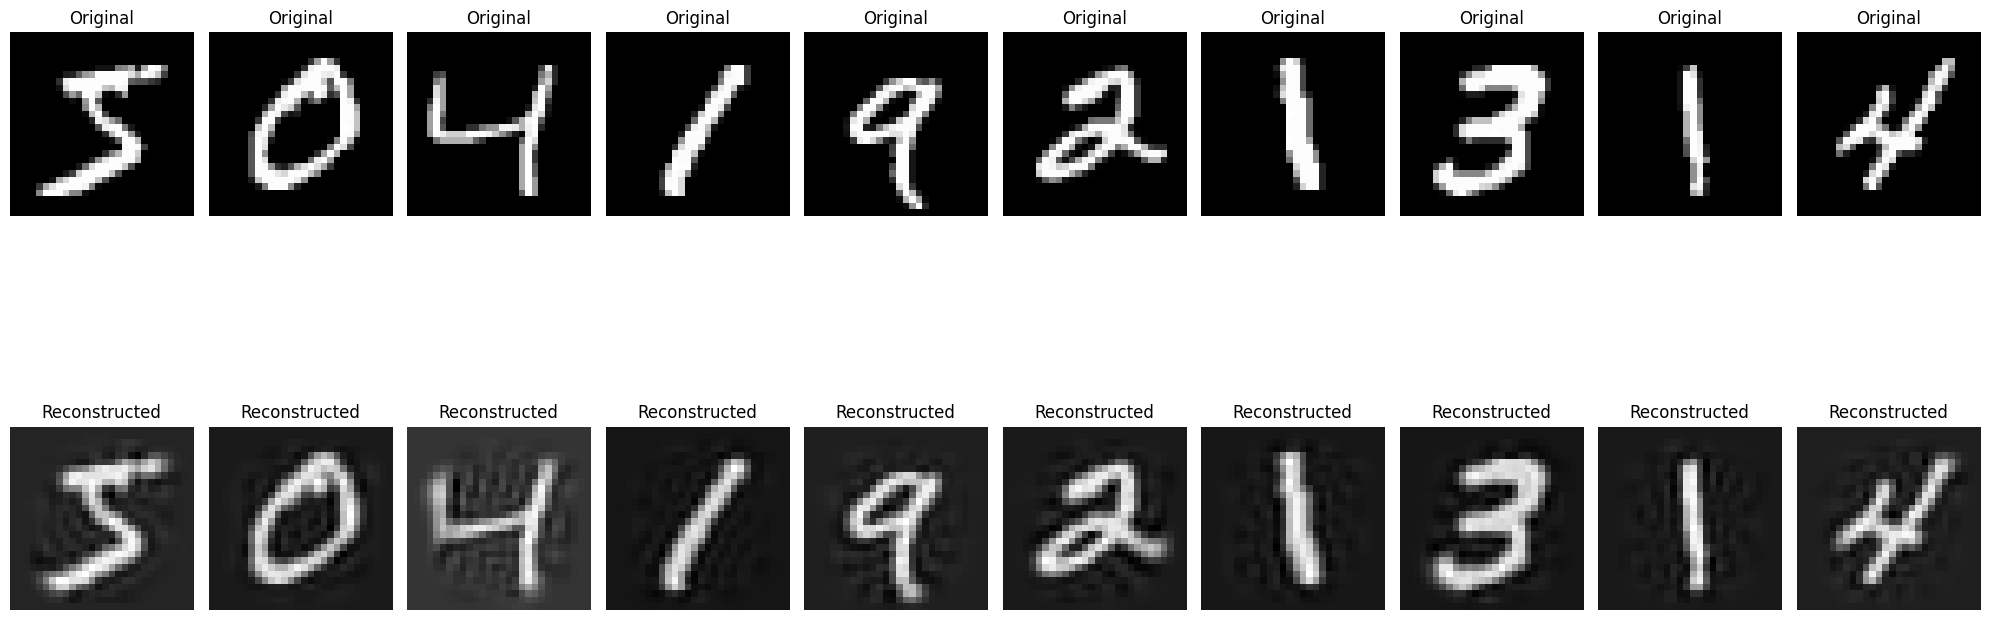

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA with 154 components
full_pca = PCA(n_components=154, svd_solver="full")
X_reduced = full_pca.fit_transform(X)
X_recovered = full_pca.inverse_transform(X_reduced)

# Display the original and reconstructed images
plt.figure(figsize=(20, 10))
num_images = 10  # Number of images to display

for i in range(num_images):
    # Original Image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(X_recovered[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()


#Incremental PCA

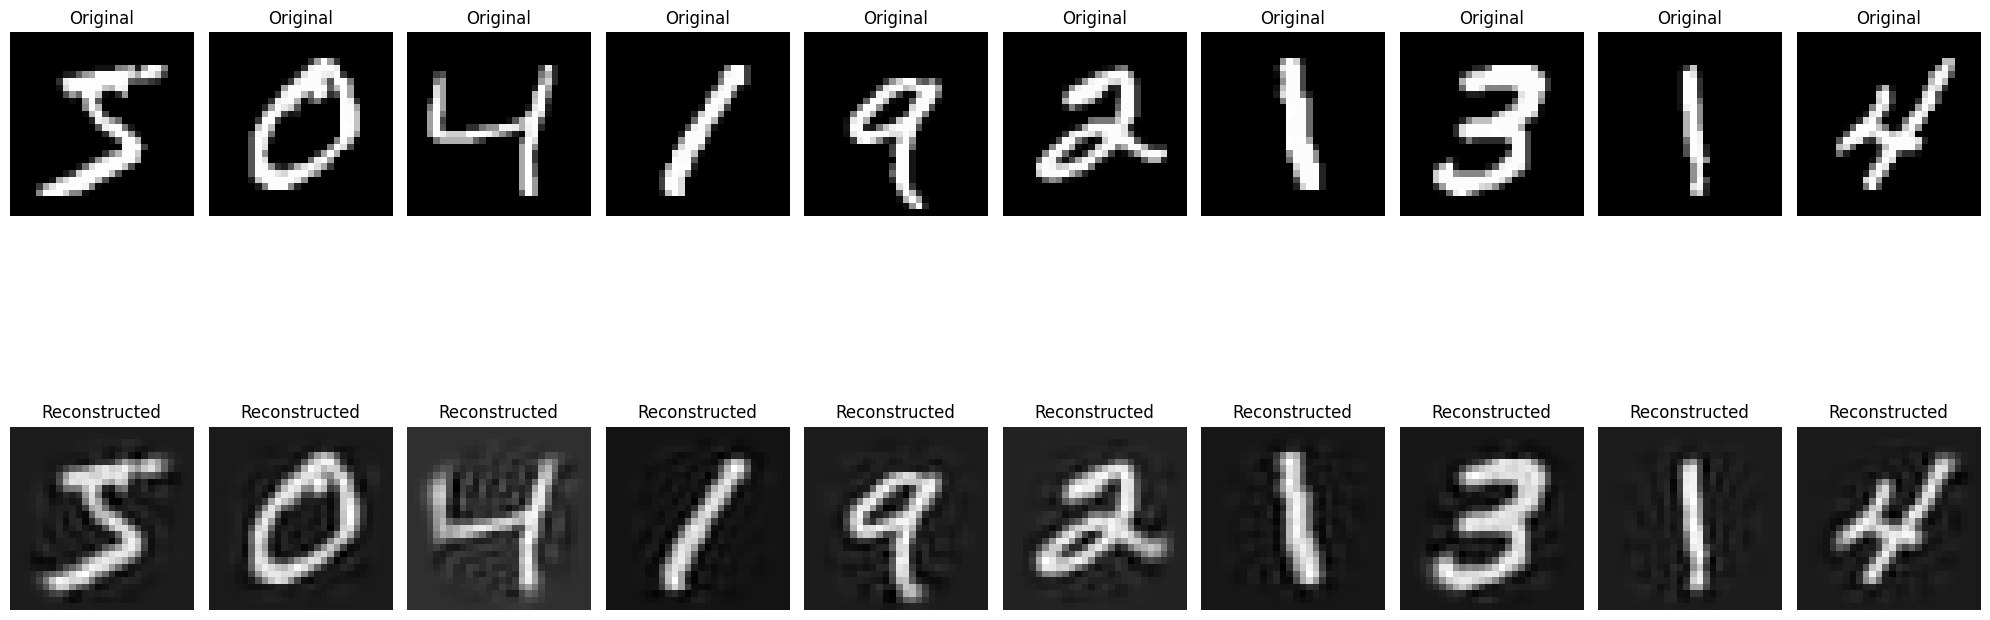

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA with 154 components
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X, n_batches):
 inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X)
X_recovered = inc_pca.inverse_transform(X_reduced)

# Display the original and reconstructed images
plt.figure(figsize=(20, 10))
num_images = 10  # Number of images to display

for i in range(num_images):
    # Original Image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(X_recovered[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()


#Kernel PCA

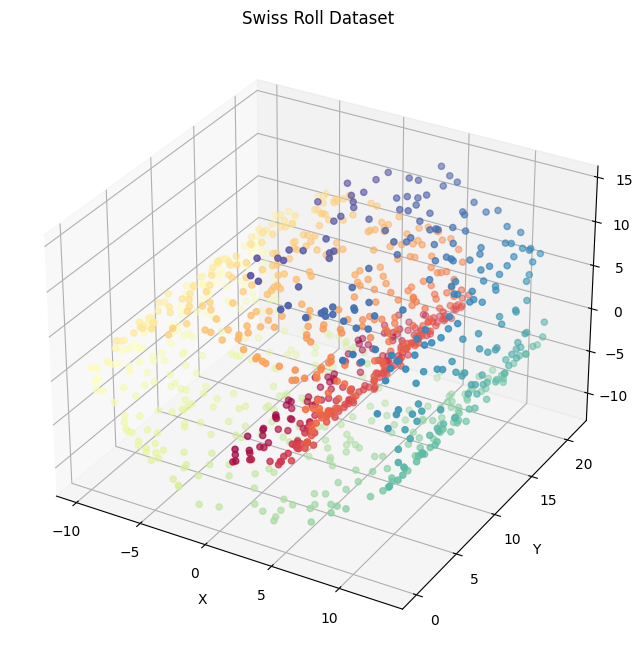

In [ ]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate Swiss Roll dataset
X, color = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Plot the Swiss Roll in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title('Swiss Roll Dataset')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

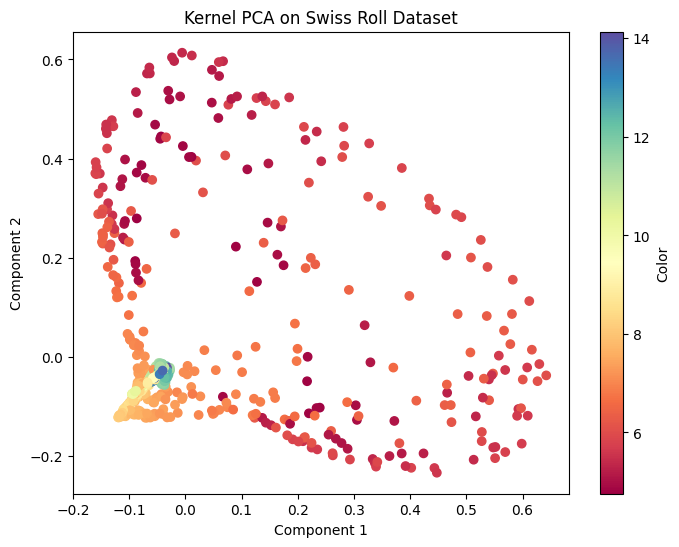

In [ ]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title('Kernel PCA on Swiss Roll Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Color')
plt.show()


In [ ]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
 fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

32.78630879576613

#Selecting a Kernel and Tuning Hyperparameters

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the pipeline
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

# Perform GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}
Best score: 0.9066666666666667


#Locally Linear Embedding (LLE)

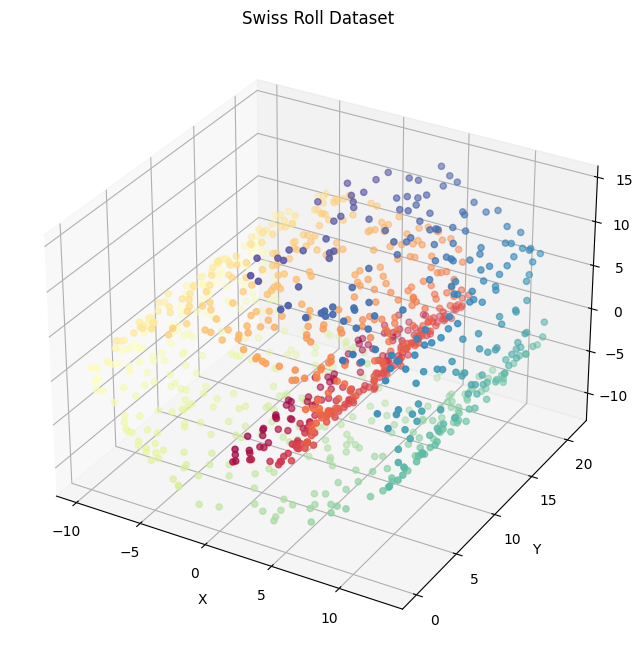

In [ ]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate Swiss Roll dataset
X, color = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Plot the Swiss Roll in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title('Swiss Roll Dataset')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

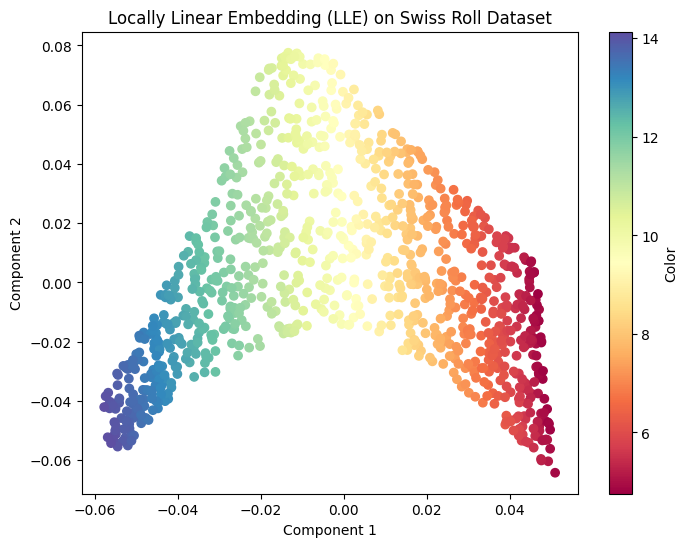

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Generate Swiss Roll dataset
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title('Locally Linear Embedding (LLE) on Swiss Roll Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Color')
plt.show()

#Multidimensional Scaling (MDS)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


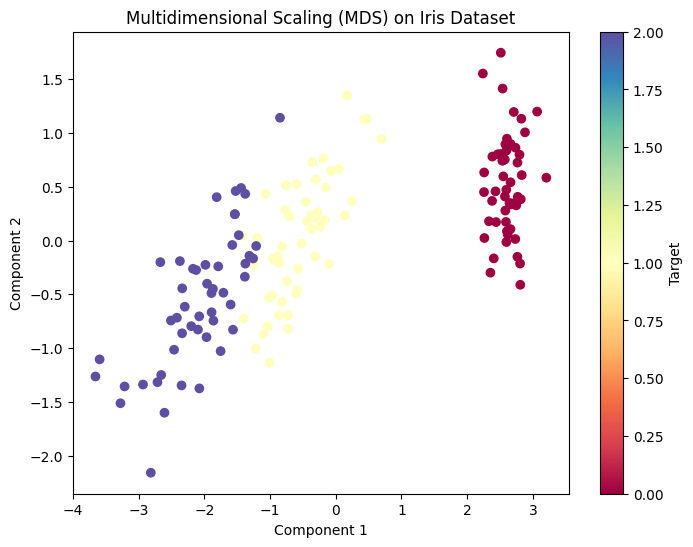

In [ ]:
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply MDS
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Multidimensional Scaling (MDS) on Iris Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Target')
plt.show()


#Isomap

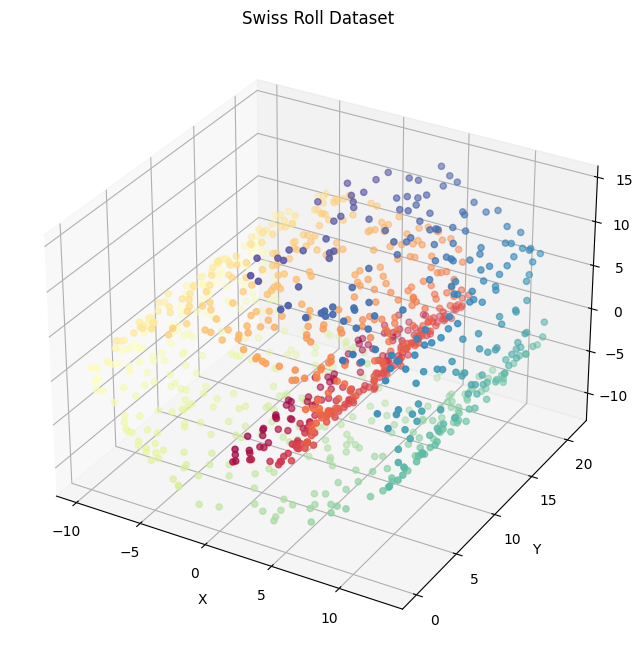

In [ ]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate Swiss Roll dataset
X, color = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Plot the Swiss Roll in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title('Swiss Roll Dataset')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

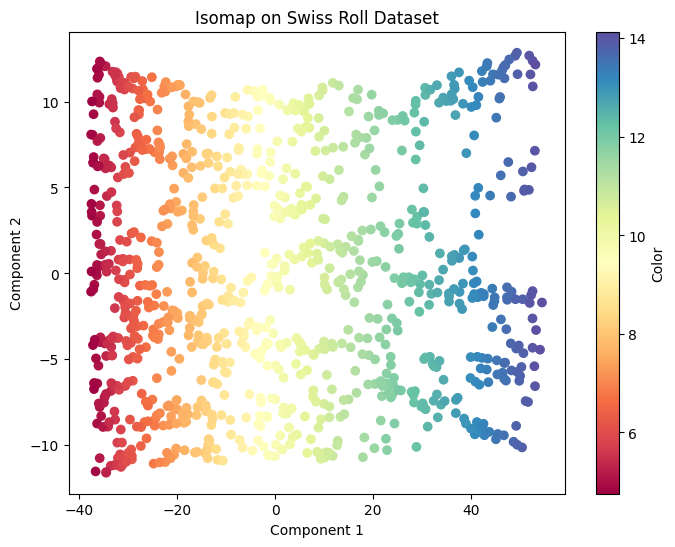

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# Apply Isomap
isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title('Isomap on Swiss Roll Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Color')
plt.show()

#t-Distributed Stochastic Neighbor Embedding (t-SNE)

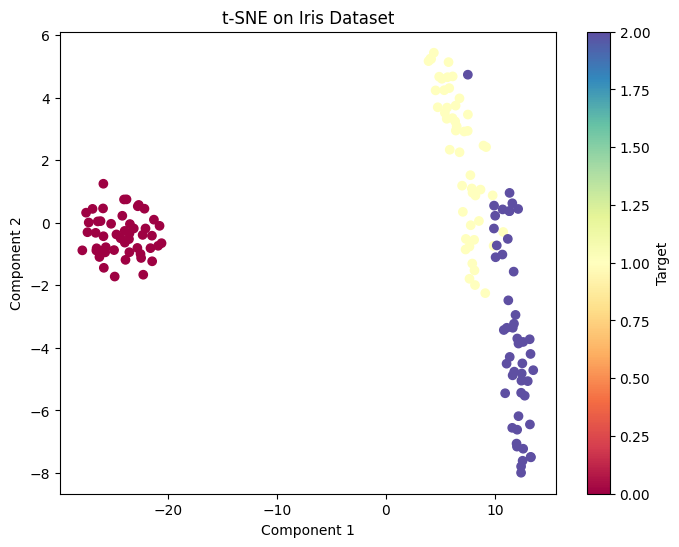

In [ ]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('t-SNE on Iris Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Target')
plt.show()

#Linear Discriminant Analysis (LDA)

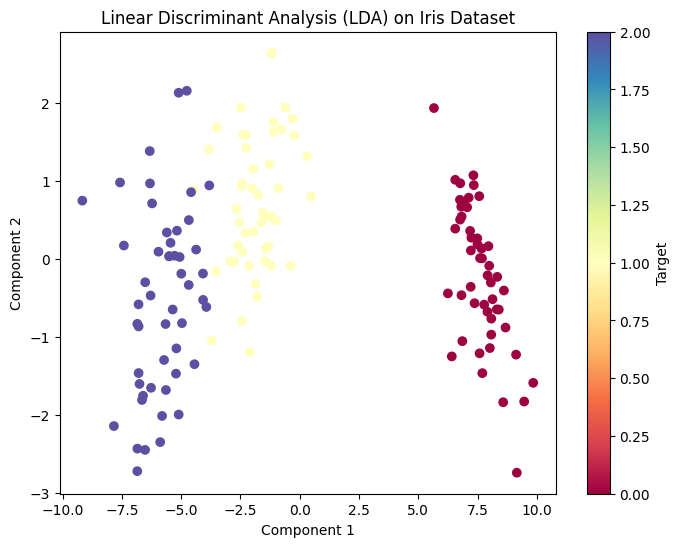

In [ ]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Linear Discriminant Analysis (LDA) on Iris Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Target')
plt.show()